In [3]:
import pandas as pd
import os
import ast

import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn as sns
import numpy as np

### Load data

In [4]:
filepath = 'audio_files/tracks.csv'
tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])
tracks.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [5]:
keep_cols = [('set', 'split'),
('set', 'subset'),('track', 'genre_top'), ('track', 'genres')]

tracks = tracks[keep_cols]
tracks.head()

set             track           
             split  subset genre_top     genres
track_id                                       
2         training   small   Hip-Hop       [21]
3         training  medium   Hip-Hop       [21]
5         training   small   Hip-Hop       [21]
10        training   small       Pop       [10]
20        training   large       NaN  [76, 103]

### Look at the MFCC Features

In [6]:
filepath = 'baseline_model/features.csv'
features = pd.read_csv(filepath, index_col=0,header=[0, 1, 2], skip_blank_lines=True )

In [7]:
mfcc = features['mfcc']
mfcc.head()

statistics   kurtosis                                                    \
number             01        02        03        04        05        06   
track_id                                                                  
2            3.856789  1.541901  0.000816  0.330728  0.118731 -0.342687   
3            4.296755  1.399977  0.112535 -0.211170  0.032953 -0.023489   
5            2.624517  2.415293  0.440233 -0.782131 -0.771069 -0.724216   
10           5.076893  1.161854  2.095651  1.372743 -0.203574 -0.345354   
20          11.880132  4.085320  0.002655  1.518562  0.181947  0.339014   

statistics                                          ...        std             \
number            07        08        09        10  ...         11         12   
track_id                                            ...                         
2          -0.259252  0.146735  0.410656 -0.162872  ...  10.059609   8.601942   
3           0.150404  0.046454  0.033484 -0.064596  ...   8.771966  10.026867   
5           0.090260  0.152119  0.261731 -0.608905  ...   8.863638   9.581952   
10         -0.529139  0.561974  0.281350 -0.150672  ...   8.289734   7.985110   
20          0.367611  0.069932 -0.016032  0.026012  ...   7.706648   6.498904   

statistics                                                              \
number            13        14        15        16        17        18   
track_id                                                                 
2           9.284250  9.245516  8.520863  8.560472  7.651871  7.246555   
3           6.978541  7.650417  9.600357  7.222888  8.398293  7.285423   
5           8.895723  8.141456  8.201844  7.780963  7.132692  7.539753   
10          7.075400  6.972649  7.071393  7.270959  7.051070  6.928591   
20          6.845514  6.934421  7.019398  6.983841  6.813648  7.520811   

statistics                      
number            19        20  
track_id                        
2           7.077188  7.391859  
3           7.417791  8.777440  
5           8.452527  7.334442  
10          6.430473  6.186294  
20          7.098001  7.032246  

[5 rows x 140 columns]

### PCA Analysis and Visualizations

(106574,) (106574,) (106574,) (106574,) (106574,)


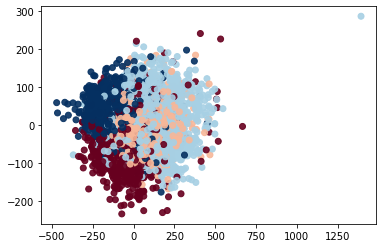

((4000, 2), (4000,))

In [26]:
small = tracks['set', 'subset'] == 'small'
isElectronic = tracks['track', 'genre_top'] == 'Electronic'
isRock = tracks['track', 'genre_top'] == 'Rock'
isInstrumental = tracks['track', 'genre_top'] == 'Instrumental'
isFolk = tracks['track', 'genre_top'] == 'Folk'

print(small.shape, isElectronic.shape, isRock.shape, isInstrumental.shape, isFolk.shape)

X = features.loc[small & (isElectronic | isRock | isInstrumental | isFolk), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[small & (isElectronic | isRock | isInstrumental | isFolk), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', alpha=0.9)
plt.show()
X.shape, y.shape

### Break into train, validation and test

In [29]:
small = tracks['set', 'subset'] == 'small'
isElectronic = tracks['track', 'genre_top'] == 'Electronic'
isRock = tracks['track', 'genre_top'] == 'Rock'
isInstrumental = tracks['track', 'genre_top'] == 'Instrumental'
isFolk = tracks['track', 'genre_top'] == 'Folk'

train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

y_train = tracks.loc[small & train & (isElectronic | isRock | isInstrumental | isFolk), ('track', 'genre_top')]
y_val = tracks.loc[small & val & (isElectronic | isRock | isInstrumental | isFolk), ('track', 'genre_top')]
y_test = tracks.loc[small & test & (isElectronic | isRock | isInstrumental | isFolk), ('track', 'genre_top')]

X_train_mfcc = features.loc[small & train & (isElectronic | isRock | isInstrumental | isFolk), 'mfcc']
X_val_mfcc = features.loc[small & val & (isElectronic | isRock | isInstrumental | isFolk), 'mfcc']
X_test_mfcc = features.loc[small & test & (isElectronic | isRock | isInstrumental | isFolk), 'mfcc']


# X_train = pd.concat([X_train_mfcc, X_train_tonnetz], axis=1)
# X_val = pd.concat([X_val_mfcc, X_val_tonnetz], axis=1)

X_train = X_train_mfcc
X_val = X_val_mfcc

print(X_train_mfcc.shape)

print('{} training examples, {} testing examples'.format(y_train.size, y_val.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(y_train).size))

(3200, 140)
3200 training examples, 400 testing examples
140 features, 4 classes


### Standardize Features and Encode Labels

In [30]:
#Shuffle training features
X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=42)

# Standardize features by removing the mean and scaling to unit variance.
scaler = skl.preprocessing.StandardScaler(copy=False)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test_mfcc)

In [31]:
## Label encode y - data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_test = le.fit_transform(y_test)
le.classes_

array(['Electronic', 'Folk', 'Instrumental', 'Rock'], dtype=object)

In [12]:
# X_train[:1]

In [32]:
y_train[:5]

array([1, 2, 2, 0, 2])

### Build models

In [33]:
from sklearn.metrics import f1_score
from time import time

In [34]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target, y_pred, average='micro', pos_label = 1)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("F1 score for val set: {:.4f}.".format(predict_labels(clf, X_val, y_val)))
    print("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=10, max_depth =4)
clf_B = SVC()
clf_C = LogisticRegression()
clf_D = RandomForestClassifier(random_state=10, max_depth=30, n_estimators=300, min_samples_leaf=6, min_impurity_decrease=0.0002,
                     class_weight='balanced')

for clf in [clf_A, clf_B, clf_C, clf_D]:
    print("\n{}: \n".format(clf.__class__.__name__))
    train_predict(clf, X_train, y_train, X_val, y_val)


DecisionTreeClassifier: 

Training a DecisionTreeClassifier using a training set size of 3200. . .
Trained model in 0.2296 seconds
Made predictions in 0.0016 seconds.
F1 score for training set: 0.6466.
Made predictions in 0.0005 seconds.
F1 score for val set: 0.5525.
Made predictions in 0.0006 seconds.
F1 score for test set: 0.5525.

SVC: 

Training a SVC using a training set size of 3200. . .
Trained model in 1.7295 seconds
Made predictions in 1.1995 seconds.
F1 score for training set: 0.8728.
Made predictions in 0.1483 seconds.
F1 score for val set: 0.7800.
Made predictions in 0.1550 seconds.
F1 score for test set: 0.7800.

LogisticRegression: 

Training a LogisticRegression using a training set size of 3200. . .


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Trained model in 1.1264 seconds
Made predictions in 0.0012 seconds.
F1 score for training set: 0.7806.
Made predictions in 0.0210 seconds.
F1 score for val set: 0.7450.
Made predictions in 0.0007 seconds.
F1 score for test set: 0.7450.

RandomForestClassifier: 

Training a RandomForestClassifier using a training set size of 3200. . .
Trained model in 6.3494 seconds
Made predictions in 0.1369 seconds.
F1 score for training set: 0.9097.
Made predictions in 0.0447 seconds.
F1 score for val set: 0.7575.
Made predictions in 0.0480 seconds.
F1 score for test set: 0.7575.


In [37]:
from sklearn.metrics import classification_report

y_true = y_test
y_pred = clf_B.predict(X_test)
labels = [0,1,2,3]
target_names = le.inverse_transform(labels)

print(y_true.shape, y_pred.shape)
print(classification_report(y_true, y_pred, target_names=target_names))

(400,) (400,)
              precision    recall  f1-score   support

  Electronic       0.78      0.81      0.79       100
        Folk       0.53      0.42      0.47       100
Instrumental       0.57      0.61      0.59       100
        Rock       0.66      0.72      0.69       100

    accuracy                           0.64       400
   macro avg       0.63      0.64      0.63       400
weighted avg       0.63      0.64      0.63       400



In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))

0.64


In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

[[81  2  7 10]
 [ 8 42 29 21]
 [ 8 25 61  6]
 [ 7 11 10 72]]
